## 1463 1로 만들기
https://www.acmicpc.net/problem/1463

정수 n이 사용할 수 있는 연산은 다음과 같이 3가지 이다.
- n이 3으로 나누어 떨어지면 3으로 나눈다.
- n이 2로 나누어 떨어지면 2로 나누다.
- 1을 뺀다.
정수 n이 주어졌을 때, 위와 같은 연산 3개를 적절히 사용해서 1을 만들려고 한다.
연산을 사용하는 회수의 최솟값을 출력한다.

<예시>

<pre>
[입력]
2
[출력]
1

[입력]
10
[출력]
3
     
</pre>

### 3차 시도 : 성공

In [4]:
from sys import stdin
input= stdin.readline

n= int(input().rstrip()) # n= 10
dp= [1]*(n+1) # [1,1,1,1,1,1,1,1,1,1,1]
dp[0], dp[1]= 0,0 # [0,0,1,1,1,1,1,1,1,1,1]

for i in range(4, n+1):
    # (2로 나눈값, 3으로 나눈 값, -1 한 값) 중 가장 작은 값을 i번째에 저장
    dp[i] += min(dp[i//2] if i%2==0 else dp[i-1],
                 # i = 4 : dp[4//2] = dp[2] = 1
                 # i = 5 : dp[5-1] = dp[4] = 2
                 # i = 6 : dp[6//2] = dp[3] = 1
                 # i = 7 : dp[7-1] = dp[6] = 2
                 # i = 8 : dp[8//2] = dp[4] = 2
                 # i = 9 : dp[9-1] = dp[8] = 3
                 # i = 10: dp[10//2] = dp[5] = 3
                 dp[i//3] if i%3==0 else dp[i-1],
                 # i = 4 : dp[4-1] = dp[3] = 1
                 # i= 5 : dp[5-1] = dp[4] = 2
                 # i = 6 : dp[6//3] = dp[2] = 1
                 # i = 7 : dp[7-1] = dp[6] = 2
                 # i = 8 : dp[8-1] = dp[7] = 3
                 # i = 9 : dp[9//3] = dp[3] = 1
                 # i = 10: dp[10-1] = dp[9] = 2
                 dp[i-1]
                 # i = 4 : dp[4-1] = dp[3] = 1
                 # i = 5 : dp[5-1] = dp[4] = 2
                 # i = 6 : dp[6-1] = dp[5] = 3
                 # i = 7 : dp[7-1] = dp[6] = 2
                 # i = 8 : dp[8-1] = dp[7] = 3
                 # i = 9 : dp[9-1] = dp[8] = 3
                 # i = 10: dp[10-1] = dp[9] = 2
                 )
    # i = 4 : dp[4] += min(1,1,1)
    # => [0,0,1,1,2,1,1,1,1,1,1]
    # i = 5 : dp[5] += min(2,2,2)
    # => [0,0,1,1,2,3,1,1,1,1,1]
    # i = 6 : dp[6] += min(1,1,3)
    # => [0,0,1,1,2,3,2,1,1,1,1]
    # i = 7 : dp[7] += min(2,2,2)
    # => [0,0,1,1,2,3,2,3,1,1,1]
    # i = 8 : dp[8] += min(2,3,3)
    # => [0,0,1,1,2,3,2,3,3,1,1]
    # i = 9 : dp[9] += min(3,1,3)
    # => [0,0,1,1,2,3,2,3,3,2,1]
    # i = 10 : dp[10] += min(3,2,2)
    # => [0,0,1,1,2,3,2,3,3,2,3]

print(dp[n]) # 출력

### 다른 사람 코드

In [ ]:
from sys import stdin

d= {1:0, 2:1}

def s(n):
    if n in d: # d에 n이 있으면
        return d[n] # d[n] 리턴
    t= 1 + min(s(n//3) + n%3, s(n//2) + n%2) # 재귀 부분
    
    d[n]= t # 없어도 되지 않을까 추측
    return t

print(s(s(int(stdin.readline()))))

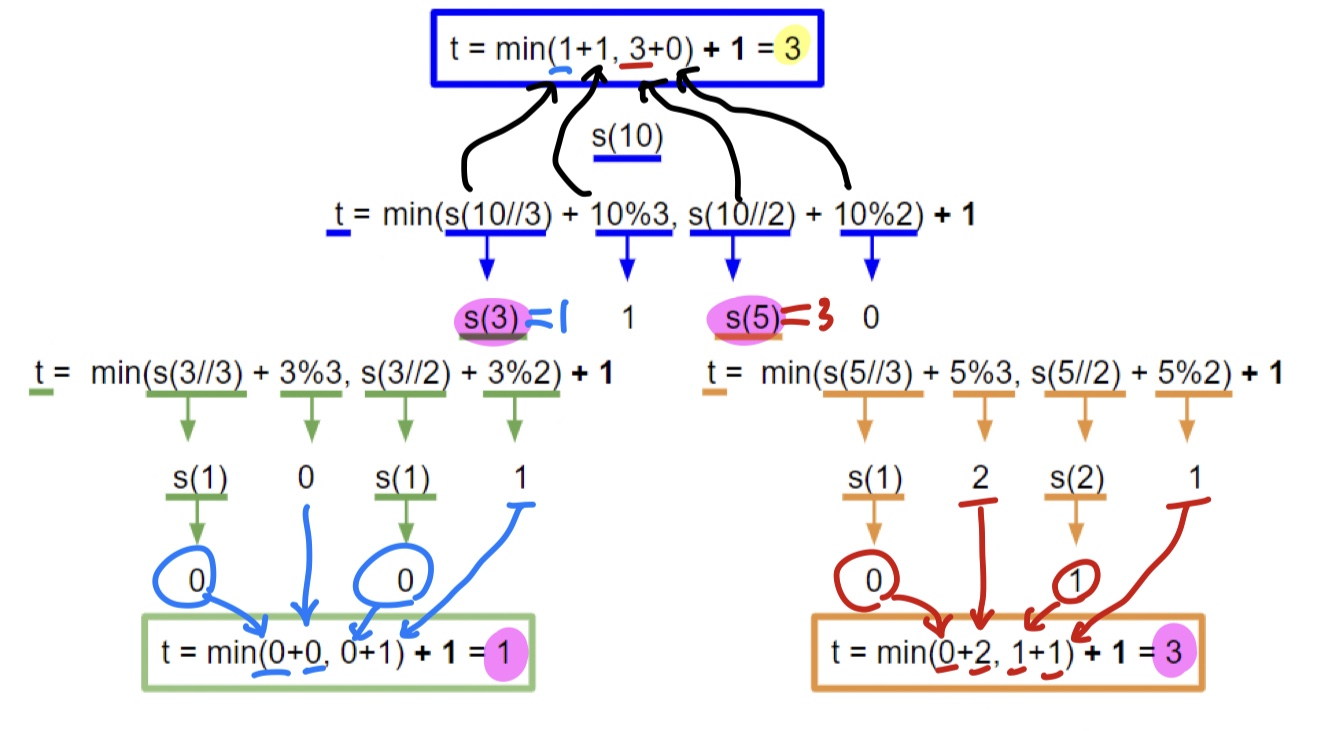